In [6]:
import pandas as pd
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

csv_file = 'benchmark.csv'
df = pd.read_csv(csv_file, index_col=None)
df = df.round(2)

In [7]:
# eject index -1
df = df[df["index"] != -1]
df

,task,index,train_size,testset_size,vit_tiny_head_3,vit_small_head_6,vit_base_head_12
1,total,0,809,5823,38.11,47.12,43.98
2,total,1,1011,5823,40.41,52.43,50.30
3,total,2,1132,5823,49.06,59.04,60.69
4,total,3,1162,5823,43.88,57.41,57.81
5,total,4,1165,5823,44.29,55.07,57.32
7,single_label,0,490,3837,69.64,82.43,76.02
8,single_label,1,709,3837,65.52,76.91,66.80
9,single_label,2,824,3837,75.92,87.36,85.74
10,single_label,3,809,3837,72.74,87.15,81.34
11,single_label,4,848,3837,68.44,84.18,81.63


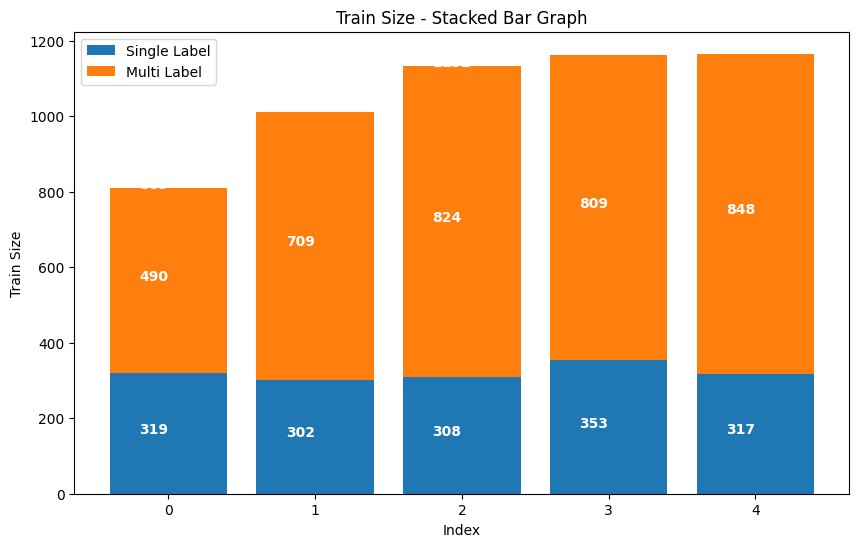

In [8]:
# Prepare data for the stacked bar graph
single_label_train_size = single_label_data['train_size'].values
multi_label_train_size = multi_label_data['train_size'].values
total_train_size = single_label_train_size + multi_label_train_size
indices = np.arange(len(single_label_data))

# Plot the stacked bar graph
plt.figure(figsize=(10, 6))
plt.bar(indices, multi_label_train_size, label='Single Label')
for i, v in enumerate(multi_label_train_size):
    # in the middle of the bar
    plt.text(i-0.2, v/2, str(v), color='white', fontweight='bold')
plt.bar(indices, single_label_train_size, bottom=multi_label_train_size, label='Multi Label')
for i, v in enumerate(single_label_train_size):
    plt.text(i-0.2, v/2+multi_label_train_size[i]+0.2, str(v), color='white', fontweight='bold')
for i, v in enumerate(total_train_size):
    plt.text(i-0.2, v+0.2, str(v), color='white', fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Train Size')
plt.title('Train Size - Stacked Bar Graph')
plt.xticks(indices, single_label_data['index'].values)
plt.legend()
plt.show()

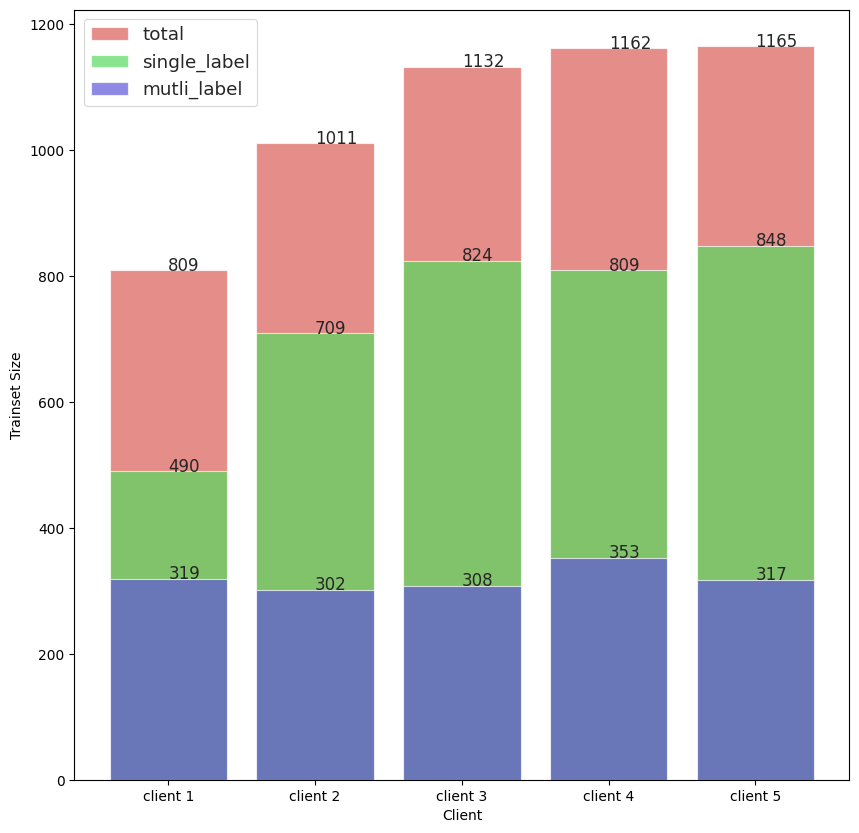

In [9]:

# task, index, dataset size 
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# plot testset size for each task
num_tasks = len(df['task'].unique())
# set the color palette
palette = sns.color_palette("hls", num_tasks)
# plot the results

for i, task in enumerate(df['task'].unique()):
    df_task = df[df['task'] == task]
    # ax.plot(df_task['index'], df_task['train_size'], label=task, color=palette[i])
    ax.bar(df_task['index'], df_task['train_size'], label=task, color=palette[i], alpha=0.7)
    # set value on top of the bar
    for j in range(len(df_task['index'])):
        ax.text(df_task['index'].iloc[j], df_task['train_size'].iloc[j], df_task['train_size'].iloc[j], fontsize=12)

tics = ["client 1", "client 2", "client 3", "client 4", "client 5"]
ax.set_xticks(np.arange(len(tics)))
ax.set_xticklabels(tics)
ax.legend()
ax.set_xlabel('Client')
ax.set_ylabel('Trainset Size')
plt.savefig('benchmark_trainset.png', dpi=300)
plt.show()

# # save the figure
# fig.savefig('benchmark.png')

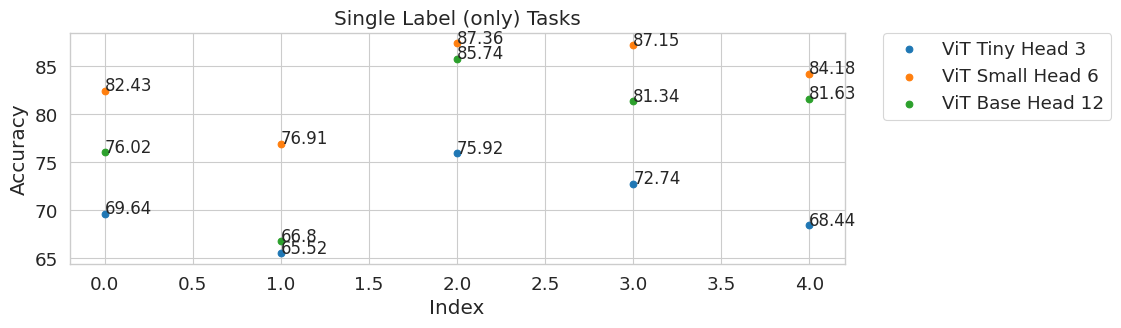

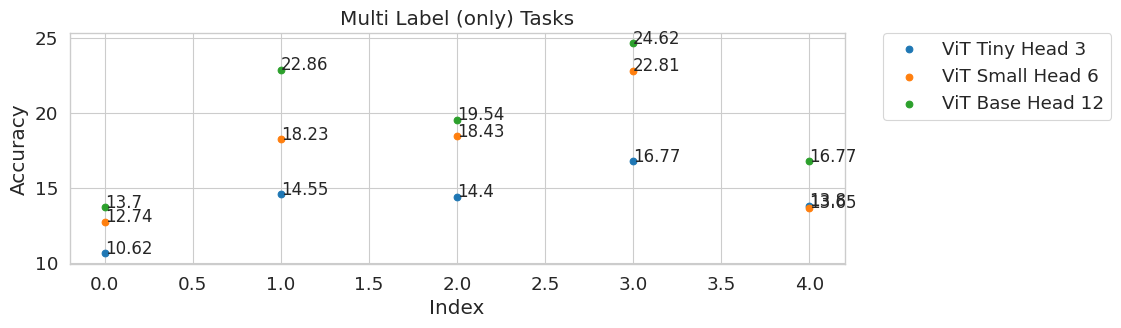

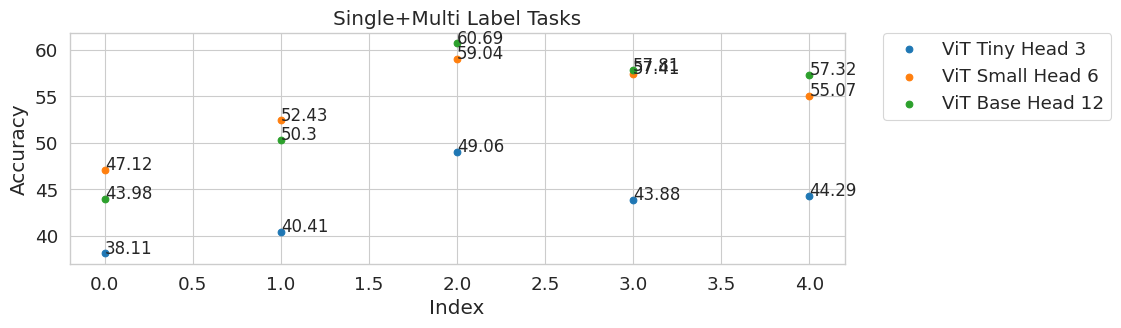

In [13]:

# Split data into single_label and multi_label categories
single_label_data = df[df['task'].str.contains('single_label')]
multi_label_data = df[df['task'].str.contains('mutli_label')]
total_label_data = df[df['task'].str.contains('total')]

# Plot the data for single_label tasks
plt.figure(figsize=(10, 3))
plt.scatter(single_label_data['index'], single_label_data['vit_tiny_head_3'], label='ViT Tiny Head 3')
for i in range(len(single_label_data['index'])):
    plt.text(single_label_data['index'].iloc[i], single_label_data['vit_tiny_head_3'].iloc[i], single_label_data['vit_tiny_head_3'].iloc[i], fontsize=12)
plt.scatter(single_label_data['index'], single_label_data['vit_small_head_6'], label='ViT Small Head 6')
for i in range(len(single_label_data['index'])):
    plt.text(single_label_data['index'].iloc[i], single_label_data['vit_small_head_6'].iloc[i], single_label_data['vit_small_head_6'].iloc[i], fontsize=12)
plt.scatter(single_label_data['index'], single_label_data['vit_base_head_12'], label='ViT Base Head 12')
for i in range(len(single_label_data['index'])):
    plt.text(single_label_data['index'].iloc[i], single_label_data['vit_base_head_12'].iloc[i], single_label_data['vit_base_head_12'].iloc[i], fontsize=12)
plt.xlabel('Index')
plt.ylabel('Accuracy')
plt.title('Single Label (only) Tasks')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('benchmark_single_label.png', dpi=300)
plt.show()

# scatter the data for multi_label tasks
plt.figure(figsize=(10, 3))
plt.scatter(multi_label_data['index'], multi_label_data['vit_tiny_head_3'], label='ViT Tiny Head 3')
for i in range(len(multi_label_data['index'])):
    plt.text(multi_label_data['index'].iloc[i], multi_label_data['vit_tiny_head_3'].iloc[i], multi_label_data['vit_tiny_head_3'].iloc[i], fontsize=12)
plt.scatter(multi_label_data['index'], multi_label_data['vit_small_head_6'], label='ViT Small Head 6')
for i in range(len(multi_label_data['index'])):
    plt.text(multi_label_data['index'].iloc[i], multi_label_data['vit_small_head_6'].iloc[i], multi_label_data['vit_small_head_6'].iloc[i], fontsize=12)
plt.scatter(multi_label_data['index'], multi_label_data['vit_base_head_12'], label='ViT Base Head 12')
for i in range(len(multi_label_data['index'])):
    plt.text(multi_label_data['index'].iloc[i], multi_label_data['vit_base_head_12'].iloc[i], multi_label_data['vit_base_head_12'].iloc[i], fontsize=12)
plt.xlabel('Index')
plt.ylabel('Accuracy')
plt.title('Multi Label (only) Tasks')
# left box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('benchmark_multi_label.png', dpi=300)
plt.show()

# scatter the data for multi_label tasks
plt.figure(figsize=(10, 3))
plt.scatter(total_label_data['index'], total_label_data['vit_tiny_head_3'], label='ViT Tiny Head 3')
for i in range(len(total_label_data['index'])):
    plt.text(total_label_data['index'].iloc[i], total_label_data['vit_tiny_head_3'].iloc[i], total_label_data['vit_tiny_head_3'].iloc[i], fontsize=12)
plt.scatter(total_label_data['index'], total_label_data['vit_small_head_6'], label='ViT Small Head 6')
for i in range(len(total_label_data['index'])):
    plt.text(total_label_data['index'].iloc[i], total_label_data['vit_small_head_6'].iloc[i], total_label_data['vit_small_head_6'].iloc[i], fontsize=12)
plt.scatter(total_label_data['index'], total_label_data['vit_base_head_12'], label='ViT Base Head 12')
for i in range(len(total_label_data['index'])):
    plt.text(total_label_data['index'].iloc[i], total_label_data['vit_base_head_12'].iloc[i], total_label_data['vit_base_head_12'].iloc[i], fontsize=12)
plt.xlabel('Index')
plt.ylabel('Accuracy')
plt.title('Single+Multi Label Tasks')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('benchmark_total_label.png', dpi=300)
plt.show()

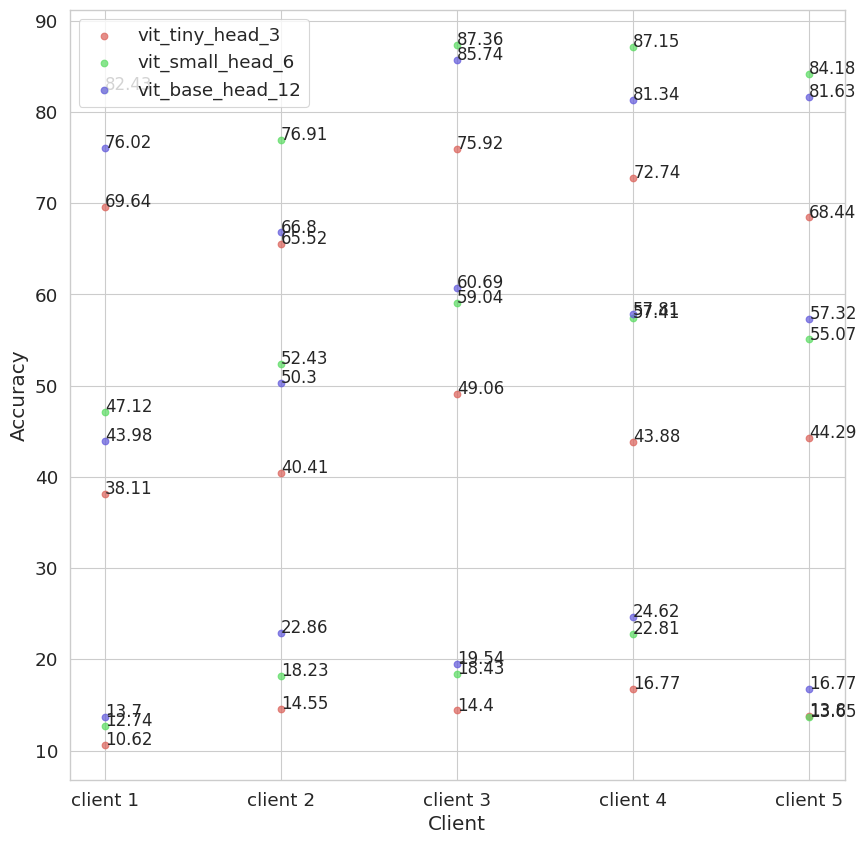

In [11]:
# plot accuracy for each task and each client and each models

fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

model_names = ['vit_tiny_head_3', 'vit_small_head_6', 'vit_base_head_12']
# set the color palette
palette = sns.color_palette("hls", len(model_names))
# plot the results
for i, model_name in enumerate(model_names):
    df_model = df
    # ax.plot(df_task['index'], df_task['train_size'], label=task, color=palette[i])
    # ax.bar(df_model['index'], df_model[model_name], label=model_name, color=palette[i], alpha=0.7)
    ax.scatter(df_model['index'], df_model[model_name], label=model_name, color=palette[i], alpha=0.7)
    #log scale
    # set value on top of the bar
    for j in range(len(df_model['index'])):
        ax.text(df_model['index'].iloc[j], df_model[model_name].iloc[j], df_model[model_name].iloc[j], fontsize=12)
     
tics = ["client 1", "client 2", "client 3", "client 4", "client 5"]
ax.set_xticks(np.arange(len(tics)))
ax.set_xticklabels(tics)
ax.legend()
ax.set_xlabel('Client')
ax.set_ylabel('Accuracy')
plt.savefig('benchmark_accuracy.png', dpi=300)
plt.show()
